In [252]:
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [110]:
Centro_Oeste = ['MS', 'MT', 'GO', 'DF']
Sudeste = ['SP', 'RJ', 'ES']
Norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
Sul = ['PR', 'RS', 'SC']
Nordeste = ['SE', 'PE', 'PI', 'MA', 'CE', 'RN', 'PB', 'AL', 'BA']
Regioes_br = [Centro_Oeste, Sudeste, Norte, Sul, Nordeste]

Downloading: 100%|██████████| 81/81 [00:00<00:00, 238.33rows/s]


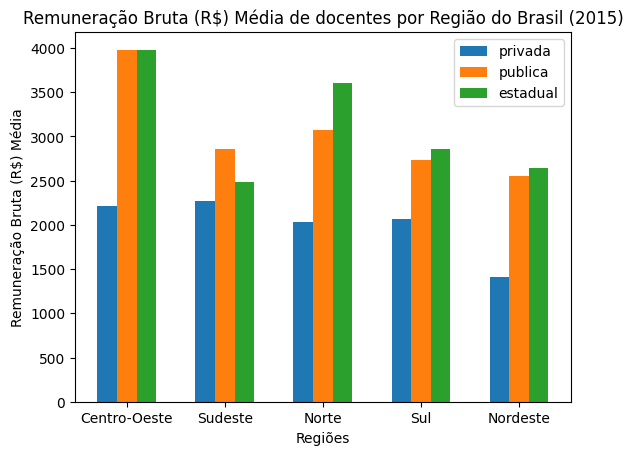

In [115]:
df_uf_rem = bd.read_sql("SELECT sigla_uf,rede,rem_bruta_rais_media \
    FROM `basedosdados.br_inep_indicadores_educacionais.uf_remuneracao_docentes` \
    WHERE ano=2015 and escolaridade='total';",
billing_project_id='45888281253')

bw = .2
Redes = set(df_uf_rem['rede'].values)
r = np.arange(len(Regioes_br))
y = []
for rede in Redes:
    y = []
    r = [i + bw for i in r]
    for reg in Regioes_br:
        y.append(sum(df_uf_rem.loc[df_uf_rem['rede'] == rede].loc[df_uf_rem['sigla_uf'].isin(reg)]['rem_bruta_rais_media'])/len(reg))
    plt.bar(r,y, width=bw, label=rede)

plt.xlabel('Regiões')
plt.ylabel('Remuneração Bruta (R$) Média')
plt.xticks([i + bw+.2 for i in range(len(y))], ['Centro-Oeste', 'Sudeste', 'Norte', 'Sul', 'Nordeste'])
plt.legend()
plt.title('Remuneração Bruta (R$) Média de docentes por Região do Brasil (2015)')
plt.show()


Downloading: 100%|██████████| 162/162 [00:00<00:00, 464.30rows/s]


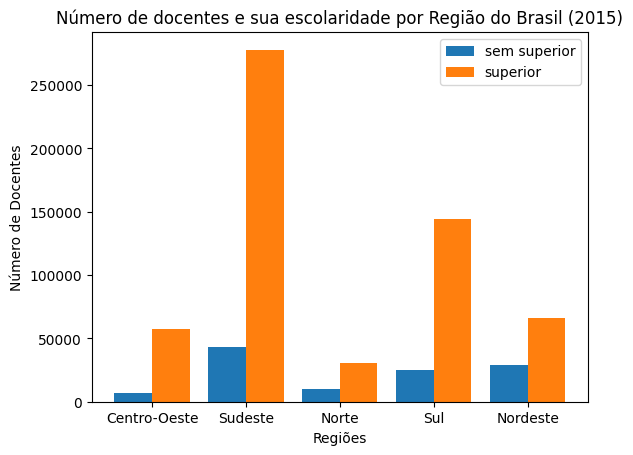

In [129]:
df_uf_rem = bd.read_sql("SELECT sigla_uf,rede,escolaridade,numero_docentes \
    FROM `basedosdados.br_inep_indicadores_educacionais.uf_remuneracao_docentes` \
    WHERE ano=2015 and escolaridade!='total';",
billing_project_id='45888281253')

bw = .4
Escolaridades = set(df_uf_rem['escolaridade'].values)
r = np.arange(len(Regioes_br))
y = []
for escolaridade in Escolaridades:
    y = []
    r = [i + bw for i in r]
    for reg in Regioes_br:
        y.append(sum(df_uf_rem.loc[df_uf_rem['escolaridade'] == escolaridade].loc[df_uf_rem['sigla_uf'].isin(reg)]['numero_docentes'])/len(reg))
    plt.bar(r,y, width=bw, label=escolaridade)

plt.xlabel('Regiões')
plt.ylabel('Número de Docentes')
plt.xticks([i + bw+.2 for i in range(len(y))], ['Centro-Oeste', 'Sudeste', 'Norte', 'Sul', 'Nordeste'])
plt.legend()
plt.title('Número de docentes e sua escolaridade por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 5/5 [00:00<00:00, 14.66rows/s]


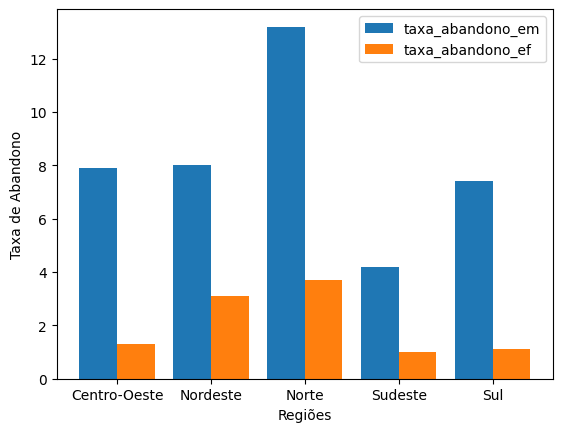

In [315]:
df_taxas_regiao2 = bd.read_sql("SELECT regiao,taxa_abandono_ef,taxa_abandono_em \
    FROM `basedosdados.br_inep_indicadores_educacionais.regiao` \
    WHERE ano=2015 and rede='total' and localizacao='total';",
billing_project_id="45888281253")

bw = .4
abandonos = {'taxa_abandono_ef', 'taxa_abandono_em'}
r = np.arange(len(df_taxas_regiao2['regiao']))
y = []
for aban in abandonos:
    r = [i + bw for i in r]
    y = df_taxas_regiao2[aban]
    plt.bar(r,y, width=bw, label=aban)

plt.xlabel('Regiões')
plt.ylabel('Taxa de Abandono')
plt.xticks([i + bw+.2 for i in range(len(y))], list(df_taxas_regiao2['regiao']))
plt.legend()
#plt.title('Taxa de Abandono por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 5/5 [00:00<00:00, 15.41rows/s]


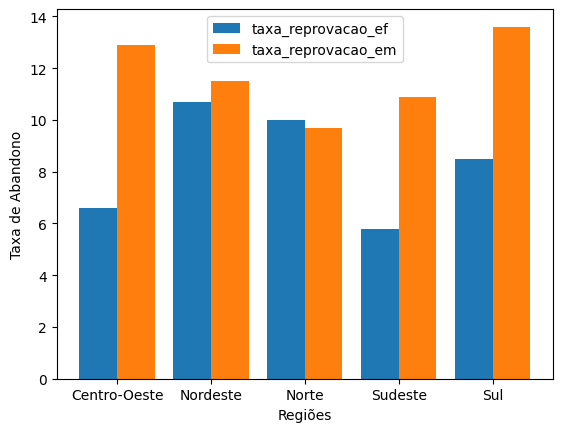

In [316]:
df_taxas_regiao2 = bd.read_sql("SELECT regiao,taxa_reprovacao_ef,taxa_reprovacao_em \
    FROM `basedosdados.br_inep_indicadores_educacionais.regiao` \
    WHERE ano=2015 and rede='total' and localizacao='total';",
billing_project_id="45888281253")

bw = .4
reprovacoes = {'taxa_reprovacao_ef','taxa_reprovacao_em'}
r = np.arange(len(df_taxas_regiao2['regiao']))
y = []
for rep in reprovacoes:
    r = [i + bw for i in r]
    y = df_taxas_regiao2[rep]
    plt.bar(r,y, width=bw, label=rep)

plt.xlabel('Regiões')
plt.ylabel('Taxa de Abandono')
plt.xticks([i + bw+.2 for i in range(len(y))], list(df_taxas_regiao2['regiao']))
plt.legend()
#plt.title('Taxa de Reprovação por Região do Brasil (2015)')
plt.show()

Downloading: 100%|██████████| 35/35 [00:00<00:00, 106.03rows/s]


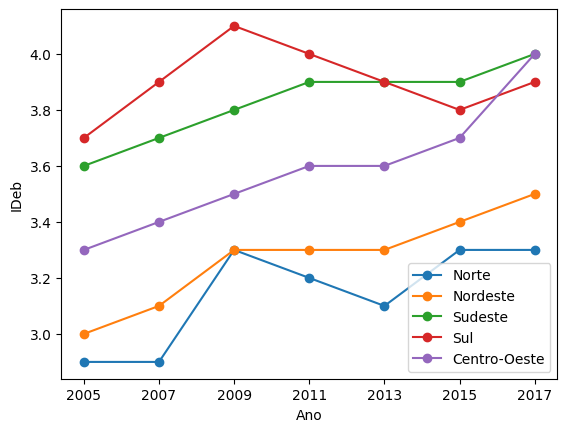

In [314]:
df_ideb = bd.read_sql("SELECT ano,regiao,ideb \
    FROM `basedosdados.br_inep_ideb.regiao` \
    WHERE ano<2019 and rede='total' and ensino='medio';",
billing_project_id="45888281253")

anos = [i for i in range(2005,2019) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
for reg in regioes:
    plt.plot(anos,df_ideb.loc[df_ideb['regiao'] == reg]['ideb'].array,'-o', label = reg)

plt.xticks(anos, anos)
plt.xlabel('Ano')
plt.ylabel('IDeb')
#plt.title('IDeb do Ensino Médio por Região do Brasil (2005-2017)')
plt.legend()
plt.show()

Downloading: 100%|██████████| 35/35 [00:00<00:00, 102.49rows/s]


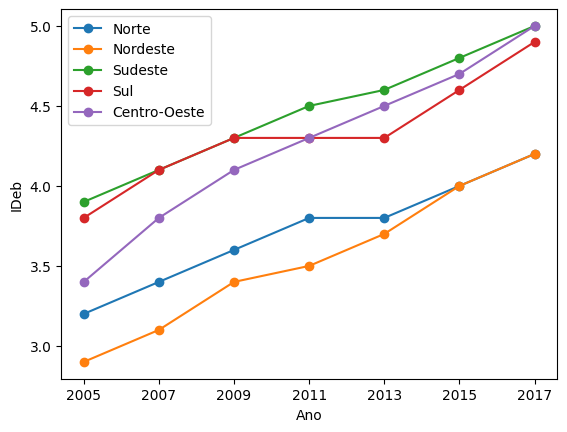

In [313]:
df_ideb = bd.read_sql("SELECT ano,regiao,ideb \
    FROM `basedosdados.br_inep_ideb.regiao` \
    WHERE ano<2019 and rede='total' and ensino='fundamental' and anos_escolares='finais (6-9)';",
billing_project_id="45888281253")

anos = [i for i in range(2005,2019) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
for reg in regioes:
    plt.plot(anos,df_ideb.loc[df_ideb['regiao'] == reg]['ideb'].array,'-o', label = reg)

plt.xticks(anos, anos)
plt.xlabel('Ano')
plt.ylabel('IDeb')
#plt.title('IDeb do Ensino Fundamental por Região do Brasil (2005-2017)')
plt.legend()
plt.show()

Downloading: 100%|██████████| 27/27 [00:00<00:00, 88.81rows/s]


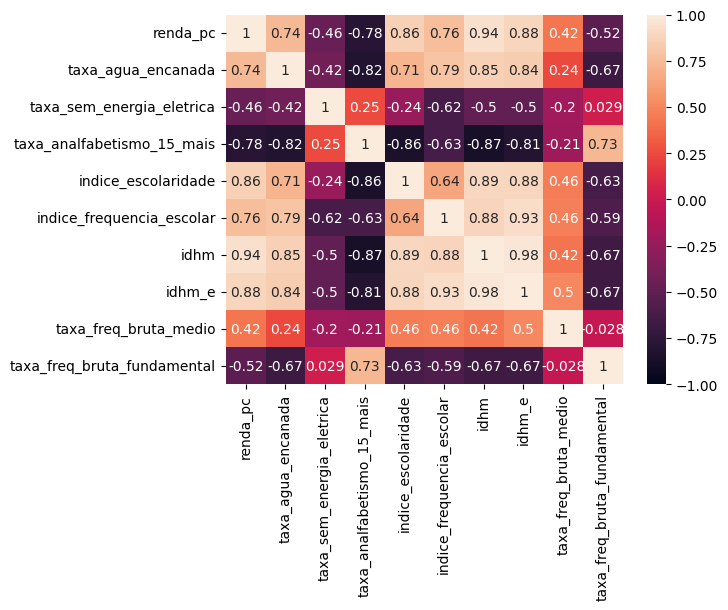

In [317]:
df_onu = bd.read_sql("SELECT ano, renda_pc, sigla_uf, taxa_agua_encanada, taxa_sem_energia_eletrica, taxa_analfabetismo_15_mais, indice_escolaridade, indice_frequencia_escolar, idhm, idhm_e, taxa_freq_bruta_medio, taxa_freq_bruta_fundamental \
    FROM `basedosdados.mundo_onu_adh.uf` \
    WHERE ano=2010;",
billing_project_id="45888281253")
sn.heatmap(df_onu.drop('ano', axis=1).corr(), annot=True,vmin=-1, vmax=1)
#plt.title('Correlação entre Variáveis do Mundo ONU (2010)')
plt.show()



In [260]:
codigos = {'AC': 12, 'AL': 27, 'AP': 16, 'AM': 13, 'BA': 29, 'CE': 23, 'DF': 53, 'ES': 32, 'GO': 52, 'MA': 21, 'MT': 51, 'MS': 50, 'MG': 31, 'PA': 15, 'PB': 25, 'PR': 41, 'PE': 26, 'PI': 22, 'RJ': 33, 'RN': 24, 'RS': 43, 'RO': 11, 'RR': 14, 'SC': 42, 'SP': 35, 'SE': 28, 'TO': 17}

dfs = []
for i in codigos.values():
    df_pib = bd.read_sql(f"SELECT ano, id_municipio, pib \
        FROM `basedosdados.br_ibge_pib.municipio` \
        WHERE ano<2021 and ano>2004 and id_municipio like '{i}%';",
billing_project_id="45888281253")
    dfs.append(df_pib)

Downloading: 100%|██████████| 2085/2085 [00:00<00:00, 5451.53rows/s]


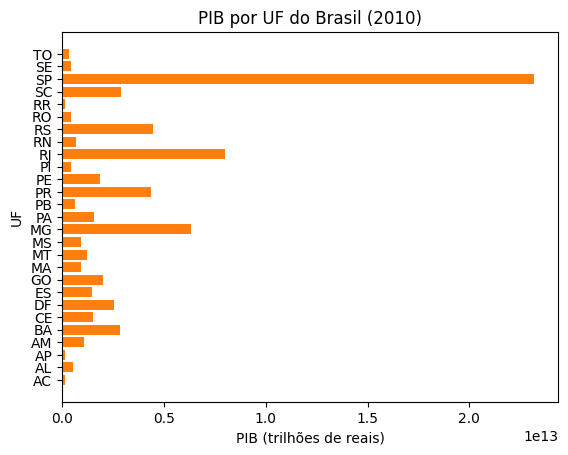

In [288]:
y = []
Anos = [i for i in range(2005,2021) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for i,uf in enumerate(codigos.items()):
    y.append(sum(dfs[i]['pib']))

plt.barh(list(codigos.keys()),y, label='PIB')
plt.xlabel('PIB (trilhões de reais)')
plt.ylabel('UF')
plt.title('PIB por UF do Brasil (2010)')
plt.show()

[6312866240961, 8009949867091, 23194986904389, 33656763529977]


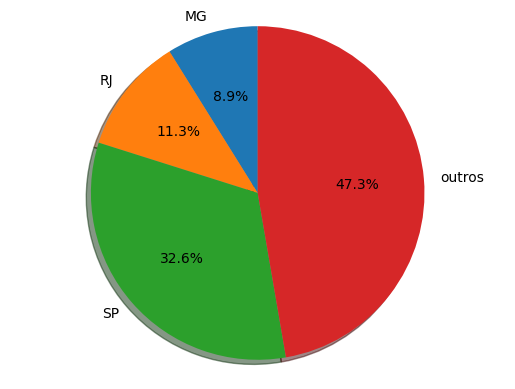

In [312]:
y = []
Anos = [i for i in range(2005,2021) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

outros = 0

labels = 'MG', 'RJ', 'SP', 'outros'

for i,uf in enumerate(codigos):
    if uf in ['SP', 'RJ', 'MG']:
        y.append(sum(dfs[i]['pib']))
    else:
        outros += sum(dfs[i]['pib'])

y.append(outros)

print(y)

fig1, ax1 = plt.subplots()
ax1.pie(y,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('PIB por UF do Brasil (2010)')
plt.show()

In [285]:
codigos = {'AC': 12, 'AL': 27, 'AP': 16, 'AM': 13, 'BA': 29, 'CE': 23, 'DF': 53, 'ES': 32, 'GO': 52, 'MA': 21, 'MT': 51, 'MS': 50, 'MG': 31, 'PA': 15, 'PB': 25, 'PR': 41, 'PE': 26, 'PI': 22, 'RJ': 33, 'RN': 24, 'RS': 43, 'RO': 11, 'RR': 14, 'SC': 42, 'SP': 35, 'SE': 28, 'TO': 17}

Centro_Oeste = ['MS', 'MT', 'GO', 'DF']
Sudeste = ['SP', 'RJ', 'ES']
Norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
Sul = ['PR', 'RS', 'SC']
Nordeste = ['SE', 'PE', 'PI', 'MA', 'CE', 'RN', 'PB', 'AL', 'BA']
Regioes_br = [Norte, Nordeste, Sudeste, Sul, Centro_Oeste]

In [303]:
dfs[0]

,ano,id_municipio,pib
0,2005,1200013,64688438
1,2006,1200013,70531492
2,2007,1200013,77839731
3,2008,1200013,88512133
4,2009,1200013,94179964
...,...,...,...
325,2015,1200807,211744189
326,2016,1200807,220840208
327,2017,1200807,229926373
328,2018,1200807,234945959


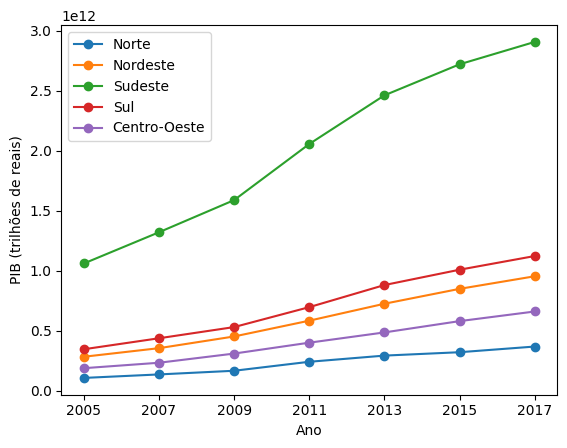

In [311]:
y = []
anos = [i for i in range(2005,2019) if i%2 != 0]
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']


for j,reg in enumerate(Regioes_br):
    y=[]
    for ano in anos:
        pib_regiao_ano = 0
        for i,uf in enumerate(codigos):
            if uf in reg:
                pib_regiao_ano += sum(dfs[i].loc[dfs[i]['ano'] == ano]['pib'])
        y.append(pib_regiao_ano)
    plt.plot(anos, y, '-o', label = regioes[j])

plt.xlabel('Ano')
plt.ylabel('PIB (trilhões de reais)')
plt.xticks(anos, anos)
plt.legend()
#plt.title('PIB por Região do Brasil (2005-2017)')
plt.show()